<a href="https://colab.research.google.com/github/katrinag2004/EDA/blob/main/EDAassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 59 (delta 11), reused 10 (delta 10), pack-reused 43 (from 1)
Receiving objects: 100% (59/59), 4.93 MiB | 3.39 MiB/s, done.
Resolving deltas: 100% (18/18), done.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28221 entries, 0 to 28220
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          28221 non-null  int64 
 1   OPEID                       28221 non-null  int64 
 2   Institution Name            28221 non-null  object
 3   City                        28221 non-null  object
 4   State                       28221 non-null  object
 5   Foreign Gift Received Date  28221 non-null  int64 
 6   Foreign Gift Amount         28221 non-null  int64 
 7   Gift Type                   28221 non-null  object
 8   Country of Giftor           28221 non-null  object
 9   Giftor Name                 24470 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


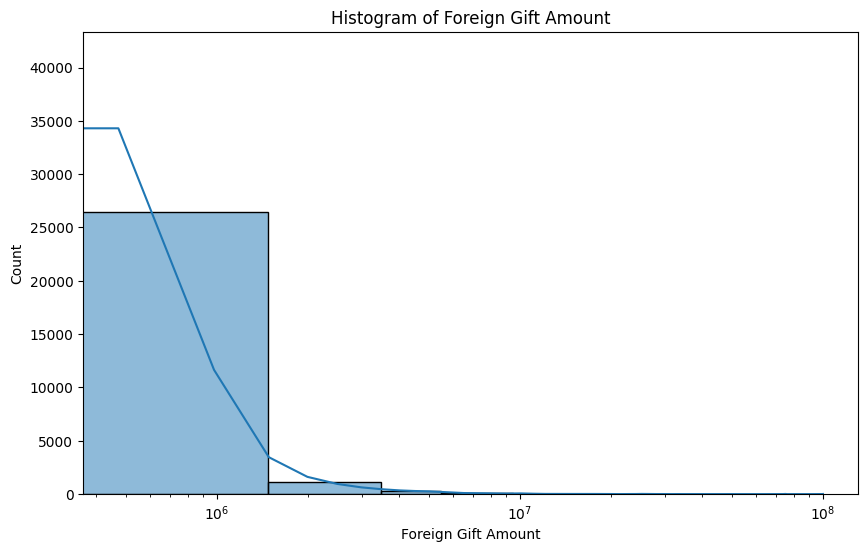

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


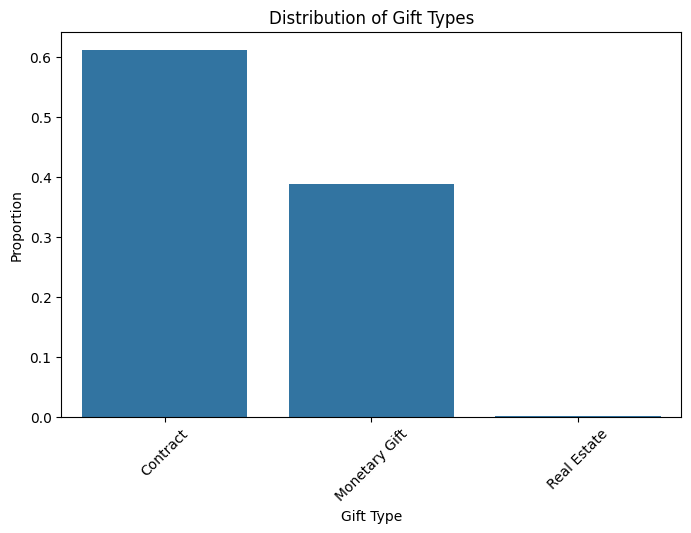

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


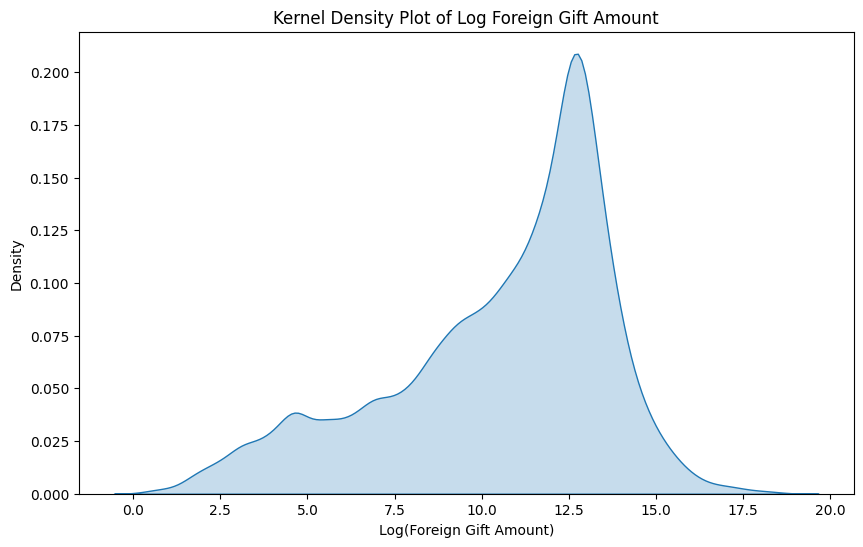

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


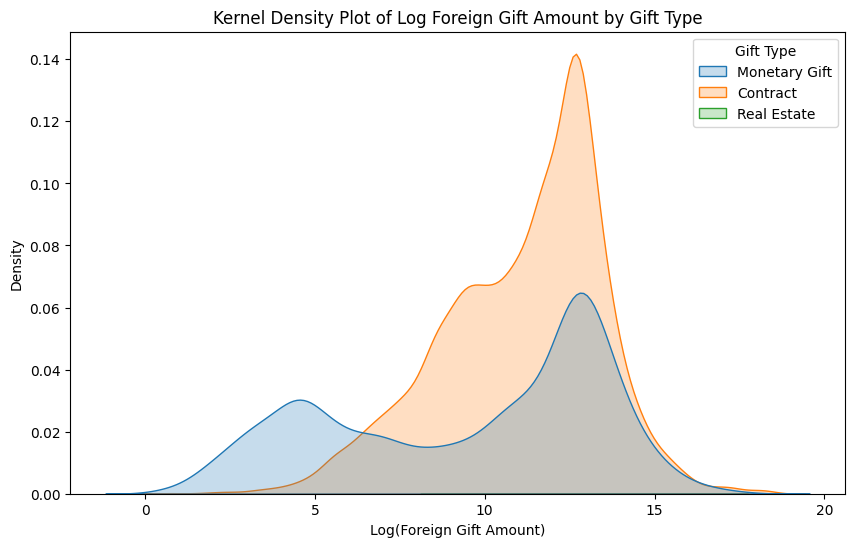

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64


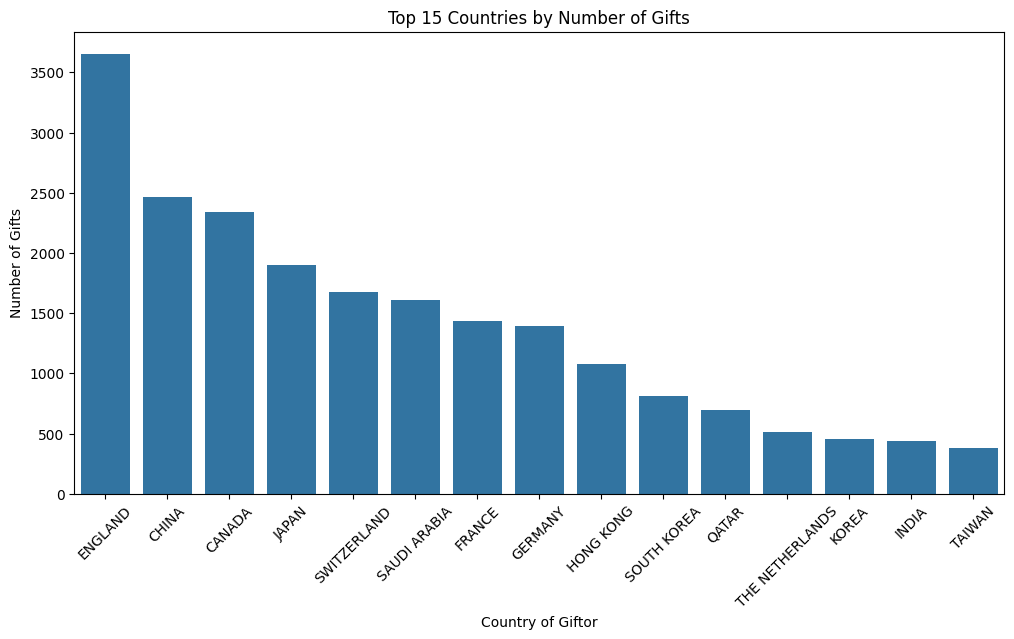

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


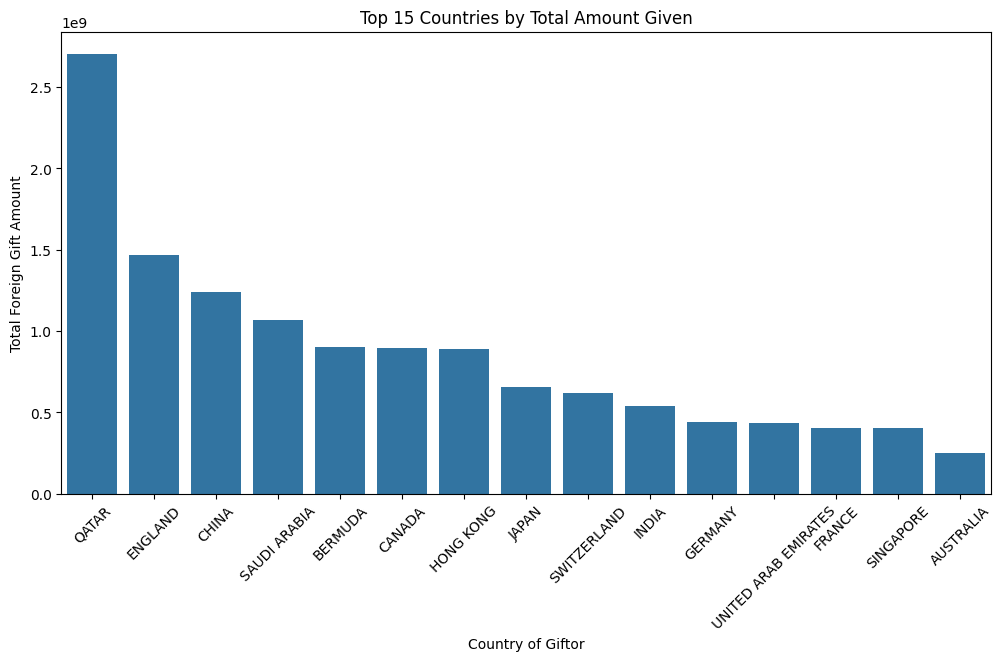

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


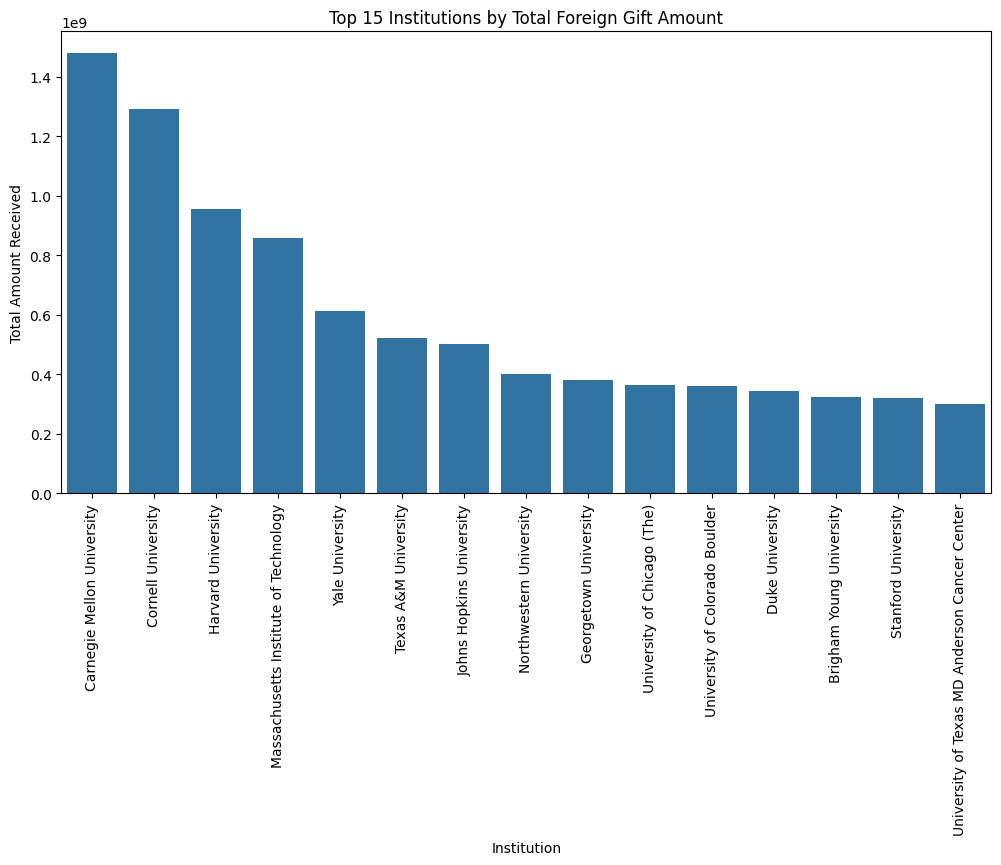

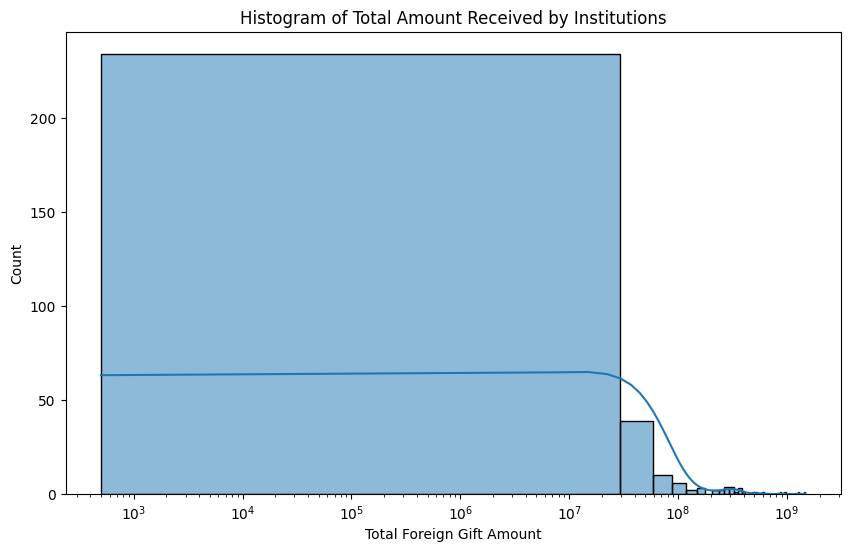

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


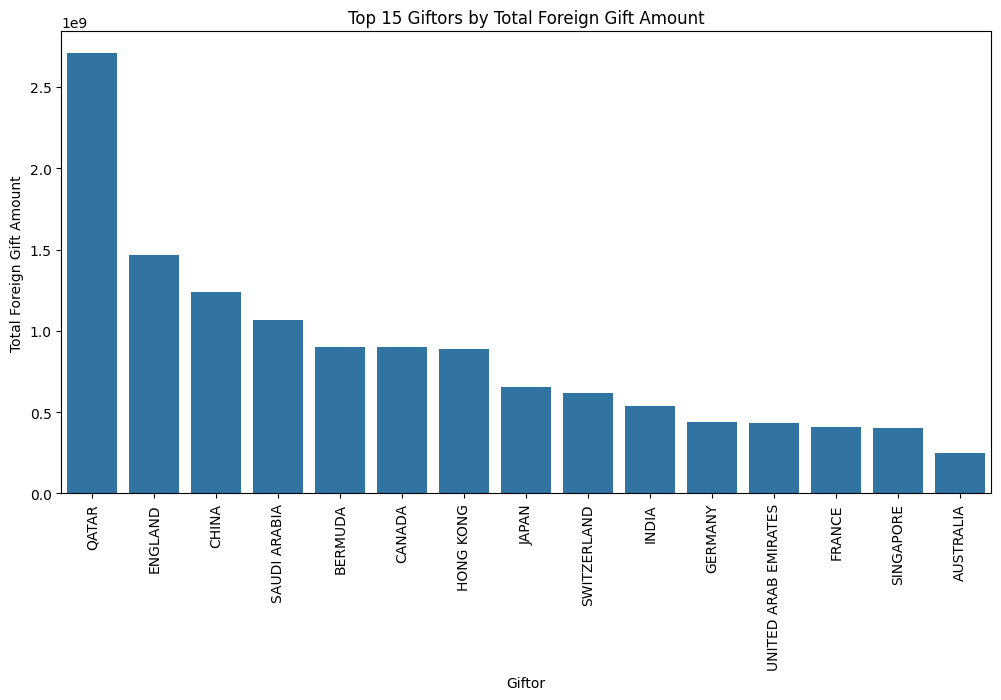

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('ForeignGifts_edu.csv')


df.info()
df.head()
plt.figure(figsize=(10,6))
sns.histplot(df['Foreign Gift Amount'], bins=50, kde=True)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Count')
plt.title('Histogram of Foreign Gift Amount')
plt.xscale('log')
plt.show()


df['Foreign Gift Amount'].describe()

gift_type_counts = df['Gift Type'].value_counts(normalize=True)
print(gift_type_counts)


plt.figure(figsize=(8,5))
sns.barplot(x=gift_type_counts.index, y=gift_type_counts.values)
plt.xlabel('Gift Type')
plt.ylabel('Proportion')
plt.title('Distribution of Gift Types')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,6))
sns.kdeplot(np.log1p(df['Foreign Gift Amount']), fill=True)
plt.xlabel('Log(Foreign Gift Amount)')
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.show()
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x=np.log1p(df['Foreign Gift Amount']), hue='Gift Type', fill=True)
plt.xlabel('Log(Foreign Gift Amount)')
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.show()
top_countries_count = df.groupby('Country of Giftor')['Foreign Gift Amount'].count().nlargest(15)
print(top_countries_count)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries_count.index, y=top_countries_count.values)
plt.xticks(rotation=45)
plt.xlabel('Country of Giftor')
plt.ylabel('Number of Gifts')
plt.title('Top 15 Countries by Number of Gifts')
plt.show()
top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print(top_countries_amount)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries_amount.index, y=top_countries_amount.values)
plt.xticks(rotation=45)
plt.xlabel('Country of Giftor')
plt.ylabel('Total Foreign Gift Amount')
plt.title('Top 15 Countries by Total Amount Given')
plt.show()
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
print(top_institutions)

plt.figure(figsize=(12,6))
sns.barplot(x=top_institutions.index, y=top_institutions.values)
plt.xticks(rotation=90)
plt.xlabel('Institution')
plt.ylabel('Total Amount Received')
plt.title('Top 15 Institutions by Total Foreign Gift Amount')
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df.groupby('Institution Name')['Foreign Gift Amount'].sum(), bins=50, kde=True)
plt.xlabel('Total Foreign Gift Amount')
plt.ylabel('Count')
plt.title('Histogram of Total Amount Received by Institutions')
plt.xscale('log')
plt.show()
top_giftors = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print(top_giftors)

plt.figure(figsize=(12,6))
sns.barplot(x=top_giftors.index, y=top_giftors.values)
plt.xticks(rotation=90)
plt.xlabel('Giftor')
plt.ylabel('Total Foreign Gift Amount')
plt.title('Top 15 Giftors by Total Foreign Gift Amount')
plt.show()




Dataset Dimensions: (30478, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtyp

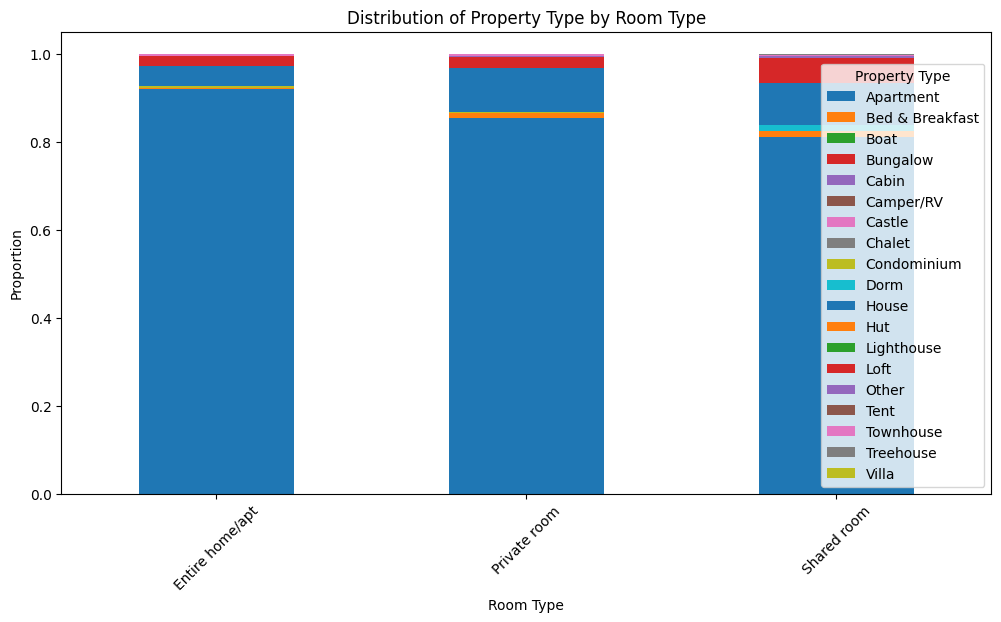

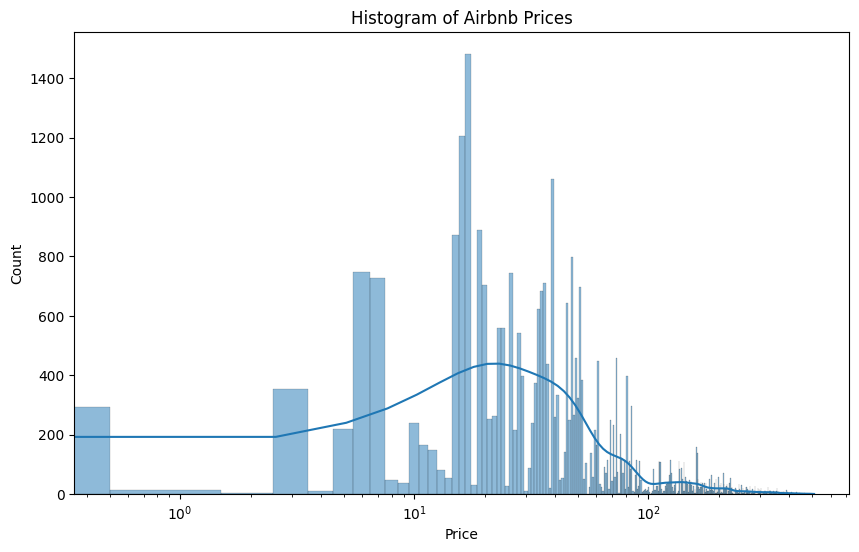

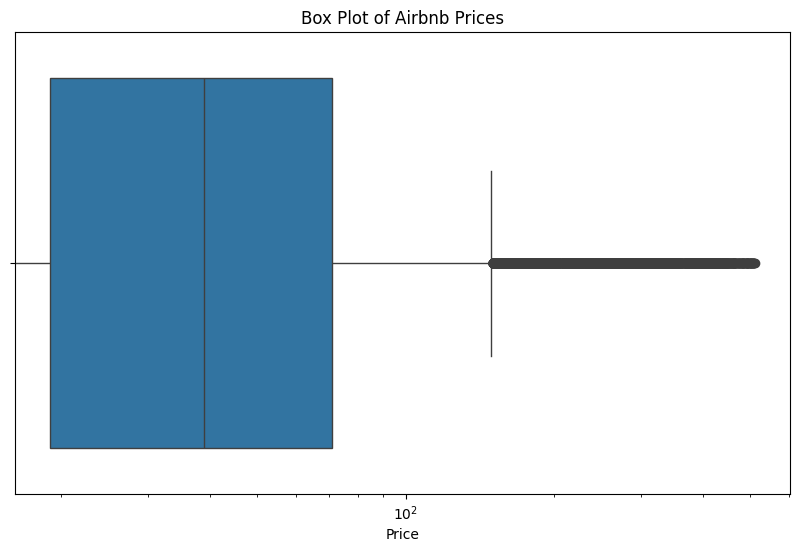

<ipython-input-18-5d35ce54e80f>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_log'] = np.log1p(df['Price'])


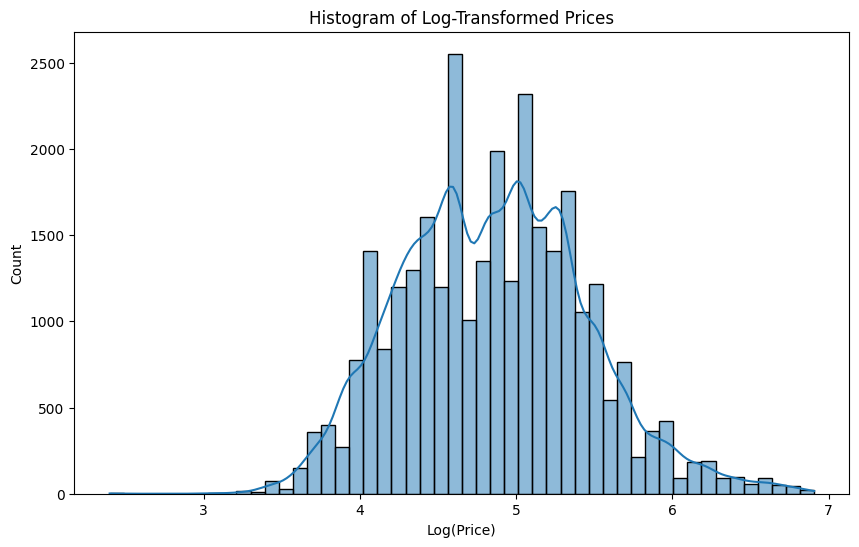

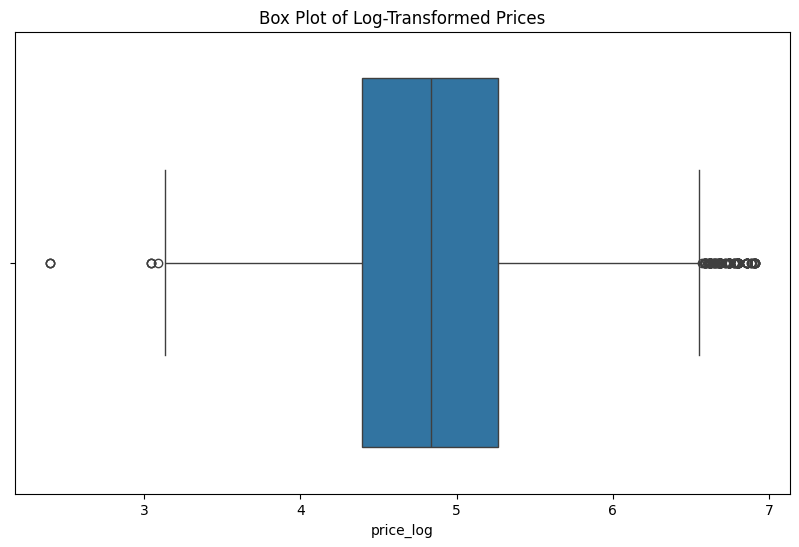

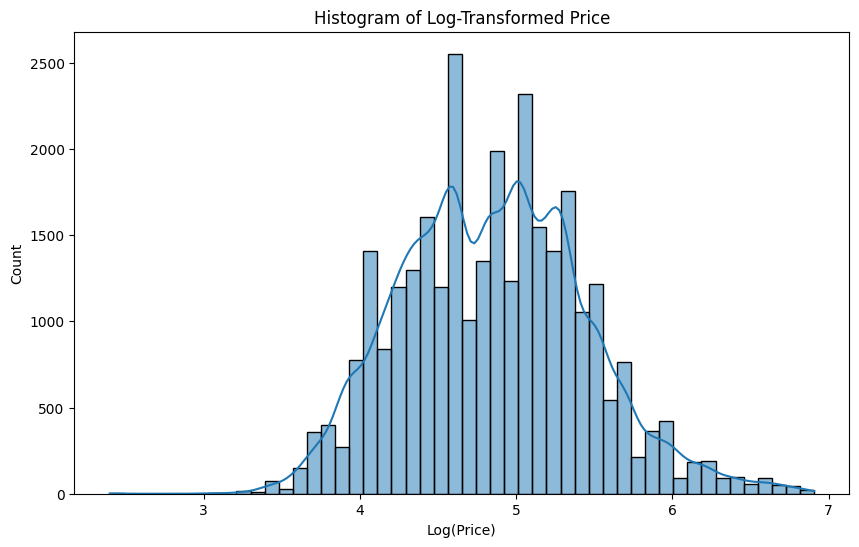

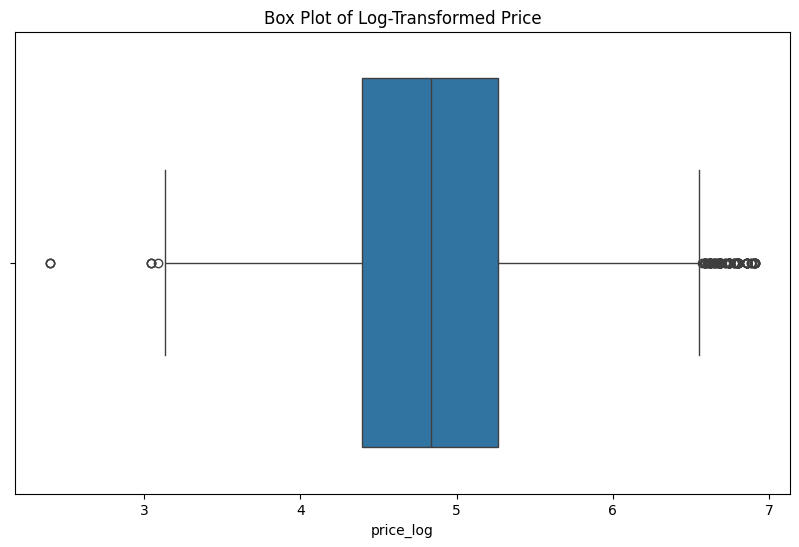

count    30297.000000
mean         4.854625
std          0.591928
min          2.397895
25%          4.394449
50%          4.836282
75%          5.262690
max          6.907755
Name: price_log, dtype: float64


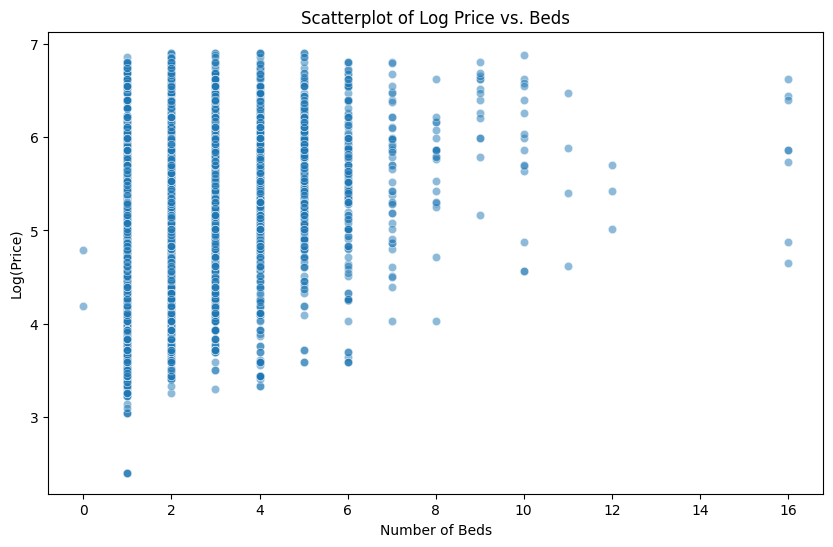

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

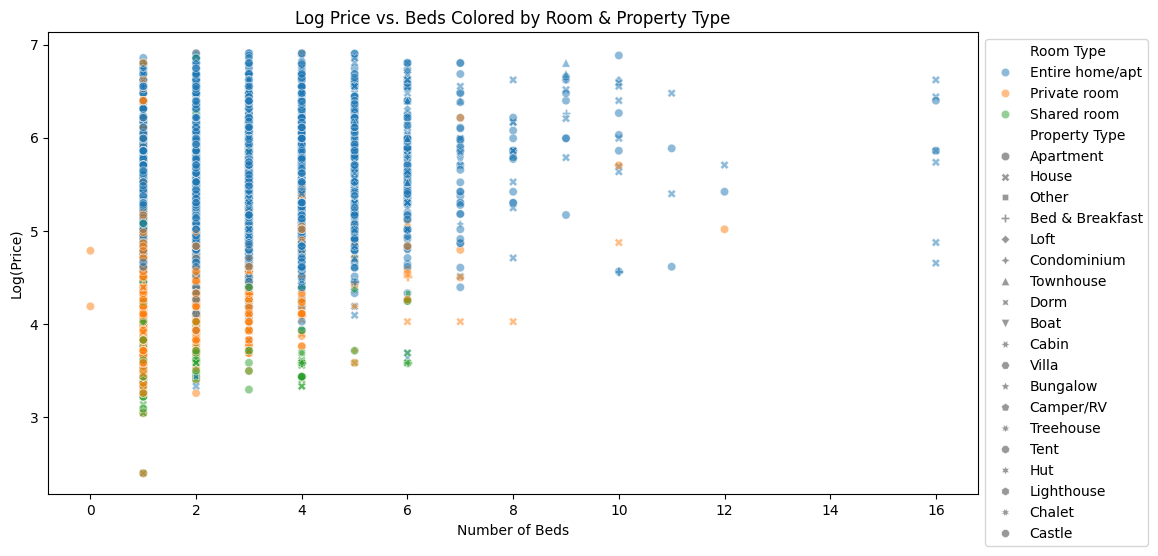

                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

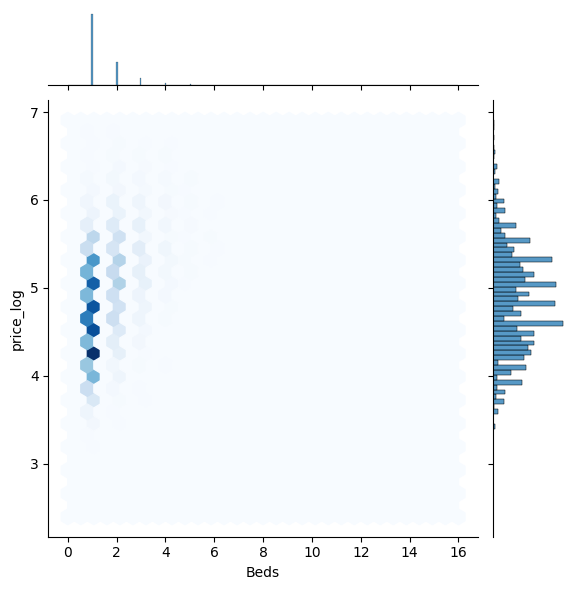

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('airbnb_hw (1).csv')


print(f"Dataset Dimensions: {df.shape}")


print(df.info())


df.head()

room_property_ct = pd.crosstab(df['Room Type'], df['Property Type'])
print(room_property_ct)


room_property_ct_normalized = room_property_ct.div(room_property_ct.sum(axis=1), axis=0)
room_property_ct_normalized.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('Proportion')
plt.title('Distribution of Property Type by Room Type')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.xlabel('Price')
plt.title('Histogram of Airbnb Prices')
plt.xscale('log')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Price'])
plt.xscale('log')
plt.title('Box Plot of Airbnb Prices')
plt.show()
df['Price'].describe()

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


df = df.dropna(subset=['Price'])


df['price_log'] = np.log1p(df['Price'])


plt.figure(figsize=(10,6))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.xlabel('Log(Price)')
plt.title('Histogram of Log-Transformed Prices')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x=df['price_log'])
plt.title('Box Plot of Log-Transformed Prices')
plt.show()


df['price_log'].describe()
df['price_log'] = np.log1p(df['Price'])

plt.figure(figsize=(10,6))
sns.histplot(df['price_log'], bins=50, kde=True)
plt.xlabel("Log(Price)")
plt.title("Histogram of Log-Transformed Price")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=df['price_log'])
plt.title("Box Plot of Log-Transformed Price")
plt.show()


print(df['price_log'].describe())
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Beds'], y=df['price_log'], alpha=0.5)
plt.xlabel("Number of Beds")
plt.ylabel("Log(Price)")
plt.title("Scatterplot of Log Price vs. Beds")
plt.show()


bed_group = df.groupby('Beds')['Price'].describe()
print(bed_group)
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Beds', y='price_log', hue='Room Type', style='Property Type', alpha=0.5)
plt.xlabel("Number of Beds")
plt.ylabel("Log(Price)")
plt.title("Log Price vs. Beds Colored by Room & Property Type")
plt.legend(bbox_to_anchor=(1,1))
plt.show()


summary_table = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(summary_table)
sns.jointplot(data=df, x='Beds', y='price_log', kind='hex', gridsize=30, cmap="Blues")
plt.show()


The dataset has 30478 observations and 13 variables

Private rooms are more common in houses. The data have a right skewed distribution.

There is a semi linear trend but mostly nonlinear in the scatterplot.
more beds have higher prices.
Entire homes apartments have the highest average prices. Shared rooms have the lowest median and highest variability.

Median is more reliable than mean due to extreme outliers in luxury properties.

The majority of listings cluster at lower bed counts and lower prices.
High density areas suggest common price points.